In [1]:
import torch
from PIL import Image

from lavis.models import load_model_and_preprocess

#### Load an example image

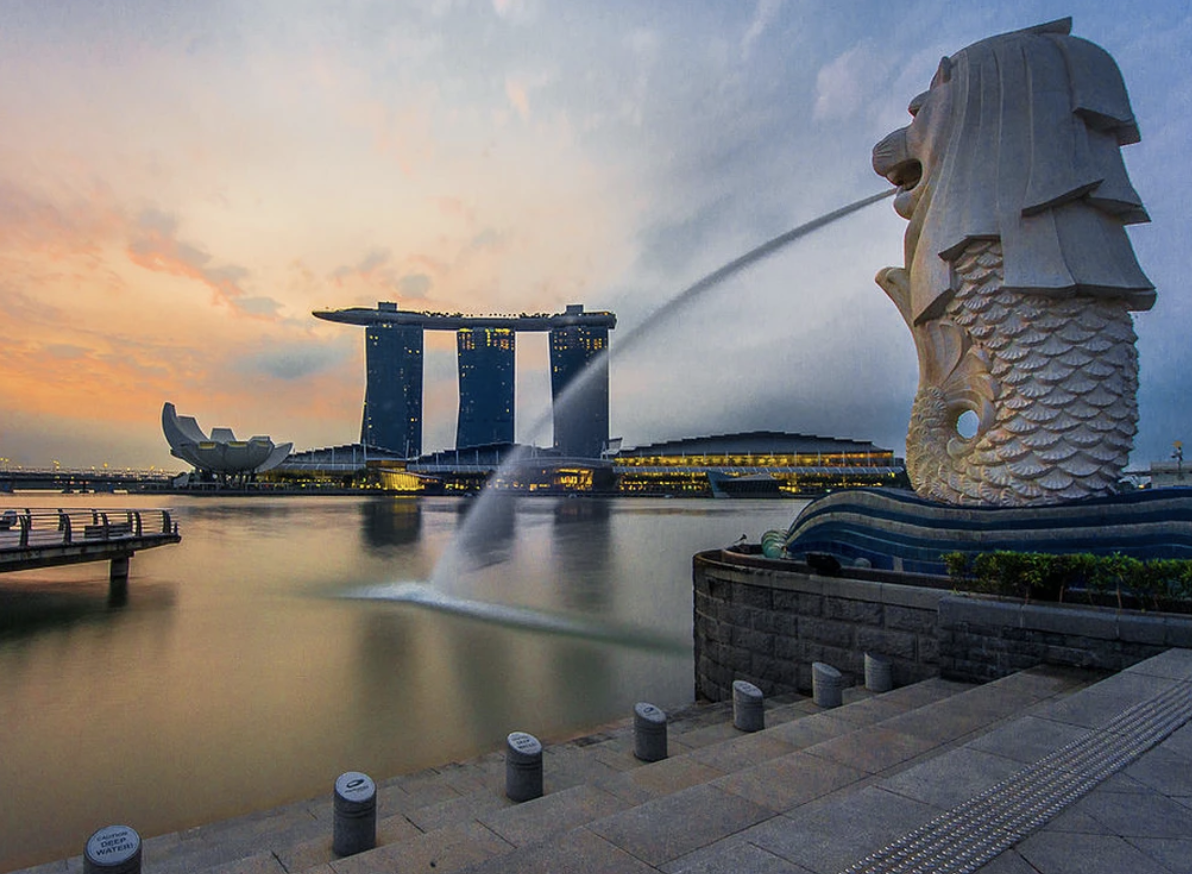

In [2]:
raw_image = Image.open("../docs/_static/merlion.png").convert("RGB")
display(raw_image.resize((596, 437)))

In [3]:
# setup device to use
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#### Load ALBEF VQA model finetuned on VQAv2

In [4]:
model, vis_processors, txt_processors = load_model_and_preprocess(name="albef_vqa", model_type="vqav2", is_eval=True, device=device)

In [5]:
vis_processors.keys()

dict_keys(['train', 'eval'])

In [6]:
txt_processors.keys()

dict_keys(['train', 'eval'])

In [7]:
question = "Which city is this photo taken?"

In [8]:
# use "eval" processors for inference
image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)
question = txt_processors["eval"](question)

samples = {"image": image, "text_input": question}

#### ranking-based question answering

In [9]:
# rank answer candidates by their likelihood and return the best answer
answer_candidates = ["Singapore", "London", "Palo Alto", "Tokyo"]

model.predict_answers(samples, answer_list=answer_candidates, inference_method="rank")

['Singapore']